###  Delivery_time -> Predict delivery time using sorting time 
#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python

In [104]:
# importing imp library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df=pd.read_csv('delivery_time.csv')

In [106]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [107]:
# EDA

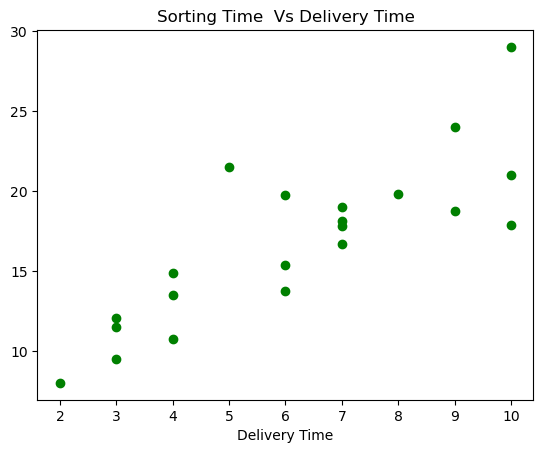

In [108]:
# plotting scatter plot
plt.scatter(df['Sorting Time'],df['Delivery Time'],color='green')
plt.xlabel('Sorting Time')
plt.xlabel('Delivery Time')
plt.title('Sorting Time  Vs Delivery Time')
plt.show()

In [109]:
# checking for null values
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [110]:
df.shape

(21, 2)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [112]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [113]:
# finding correlation between target and feature
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


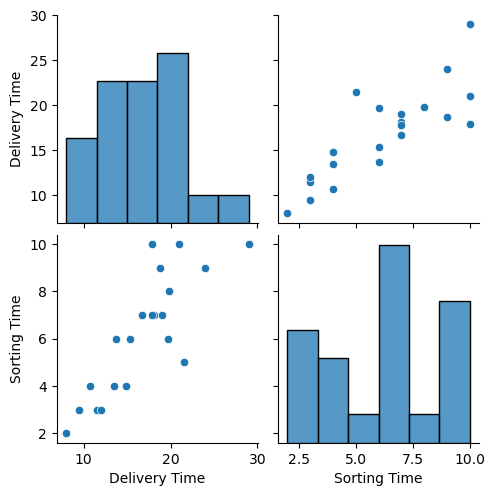

In [114]:
sns.pairplot(df)

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


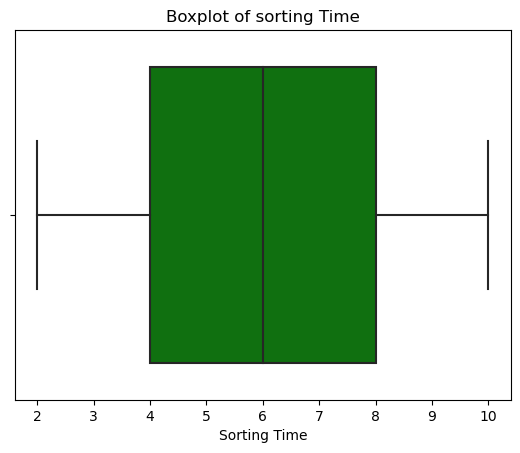

In [115]:
#boxplot of sorting time
sns.boxplot(df['Sorting Time'],color='green')
plt.title('Boxplot of sorting Time')
plt.show()

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Delivery Time')

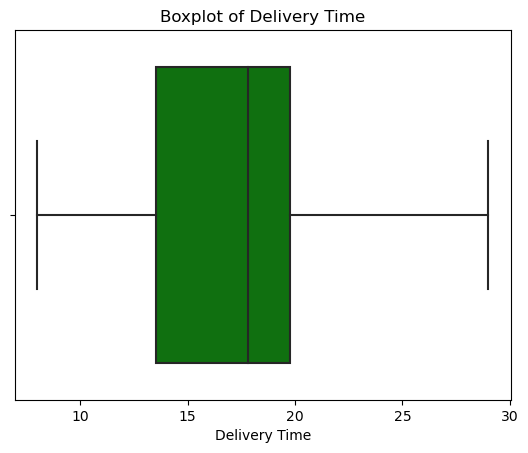

In [116]:
#boxplot of delivery time
sns.boxplot(df['Delivery Time'],color='green')
plt.title('Boxplot of Delivery Time')

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

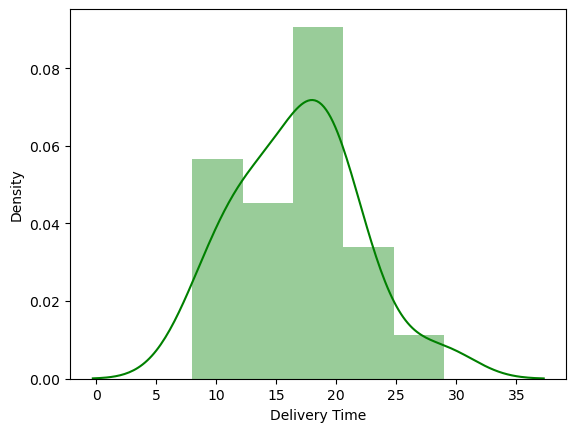

In [117]:
sns.distplot(df['Delivery Time'],color='green')

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

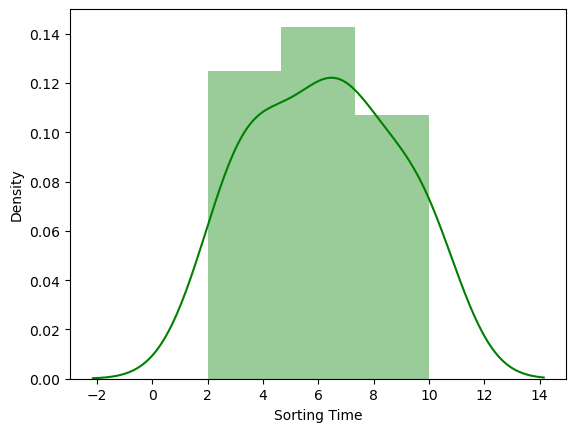

In [118]:
sns.distplot(df['Sorting Time'],color='green')

In [1]:
# spliting in to target and feature
x=pd.DataFrame(df['Sorting Time'])
y=pd.DataFrame(df['Delivery Time'])

NameError: name 'pd' is not defined

In [120]:
# splitting data in to train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [121]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(5, 1)
(16, 1)
(5, 1)


In [122]:
# Train the algorithm
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [144]:
# Rerive the intercept
b=lr.intercept_
b

array([6.41583967])

In [145]:
# Retrieve the slope
m=lr.coef_
m

array([[1.65695232]])

In [125]:
# Predicted Value
y_pred=lr.predict(X_test)
y_pred
pd.DataFrame(data=y_pred,columns=['predicted value of Delivery Time'])

,predicted value of Delivery Time
0,19.671458
1,18.014506
2,22.985363
3,11.386697
4,21.328411


In [126]:
#Actual value of Delivery Time
y_test

,Delivery Time
10,19.83
6,19.00
0,21.00
14,12.03
3,24.00


In [127]:
# Evaluate the alogorithm
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Eroor:',metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 1.288858327574292
Mean Squared Eroor: 2.4978458765150036
Mean Absolute Error: 1.580457489626027


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

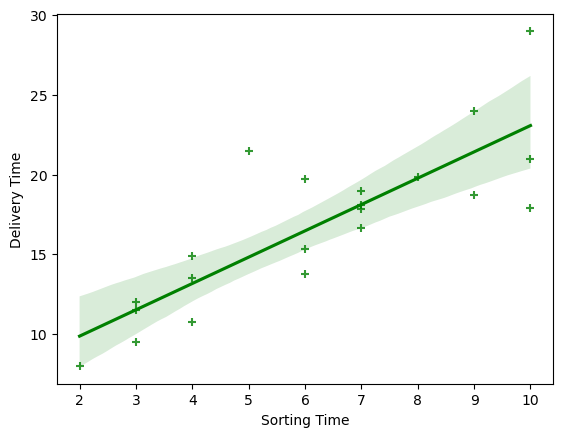

In [129]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'],color='Green',marker='+')

In [150]:
# predicting For individual value for Delivery Time
# y = mx + b

In [151]:
y=m * 7 + b
y

array([[18.01450587]])